<a href="https://colab.research.google.com/github/nityaboyapati99/01tut/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, GRU, Bidirectional, Dense, Dropout, Input, BatchNormalization


In [ ]:
#taking 10 companies you can increase it more
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NVDA', 'NFLX', 'IBM', 'INTC', 'AMD', 'ORCL', 'CSCO', 'QCOM', 'ADBE']

In [ ]:
# Load ESG data ->
import pandas as pd
esg_file_path = '/content/sp500_esg_data.csv'
esg_data = pd.read_csv(esg_file_path)

print(esg_data.head())

  Symbol                Full Name             GICS Sector  \
0      A     Agilent Technologies             Health Care   
1    AAL  American Airlines Group             Industrials   
2   AAPL               Apple Inc.  Information Technology   
3   ABBV                   AbbVie             Health Care   
4    ABT      Abbott Laboratories             Health Care   

                            GICS Sub-Industry  environmentScore  socialScore  \
0              Life Sciences Tools & Services              1.12         6.42   
1                          Passenger Airlines              9.94        11.65   
2  Technology Hardware, Storage & Peripherals              0.46         7.39   
3                               Biotechnology              2.38        17.19   
4                       Health Care Equipment              2.27        14.24   

   governanceScore  totalEsg  highestControversy  percentile  ratingYear  \
0             6.10     13.64                 2.0        7.98      2023.0   


In [ ]:
results = {}

In [ ]:
time_steps = 10
batch_size = 32
epochs = 30 #idk try increasing epoches to check the accuracy

In [ ]:
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [ ]:
# here we are doing LSTM, GRU and BILSTM to see which is the preforming good
def build_model(model_type):

    model = Sequential()
    model.add(Input(shape=(time_steps, 5)))

    if model_type == 'LSTM':
        model.add(LSTM(100, return_sequences=True))
        model.add(Dropout(0.3))
        model.add(LSTM(50, return_sequences=False))

    elif model_type == 'GRU':
        model.add(GRU(100, return_sequences=True))
        model.add(Dropout(0.3))
        model.add(GRU(50, return_sequences=False))

    elif model_type == 'BiLSTM':
        model.add(Bidirectional(LSTM(100, return_sequences=True)))
        model.add(Dropout(0.3))
        model.add(Bidirectional(LSTM(50, return_sequences=False)))

    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [ ]:
# Function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test, scaler, model_name, ticker):
    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=0)
    predictions = model.predict(X_test)

    y_test_inverse = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 4))), axis=1))[:, 0]
    predictions_inverse = scaler.inverse_transform(np.concatenate((predictions.reshape(-1, 1), np.zeros((len(predictions), 4))), axis=1))[:, 0]

    rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions_inverse))
    mae = mean_absolute_error(y_test_inverse, predictions_inverse)
    r2 = r2_score(y_test_inverse, predictions_inverse)

    return predictions_inverse, rmse, mae, r2, y_test_inverse

[*********************100%***********************]  1 of 1 completed

Processing AAPL...
Training LSTM Model for AAPL...


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 447ms/step
Training GRU Model for AAPL...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
Training BiLSTM Model for AAPL...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


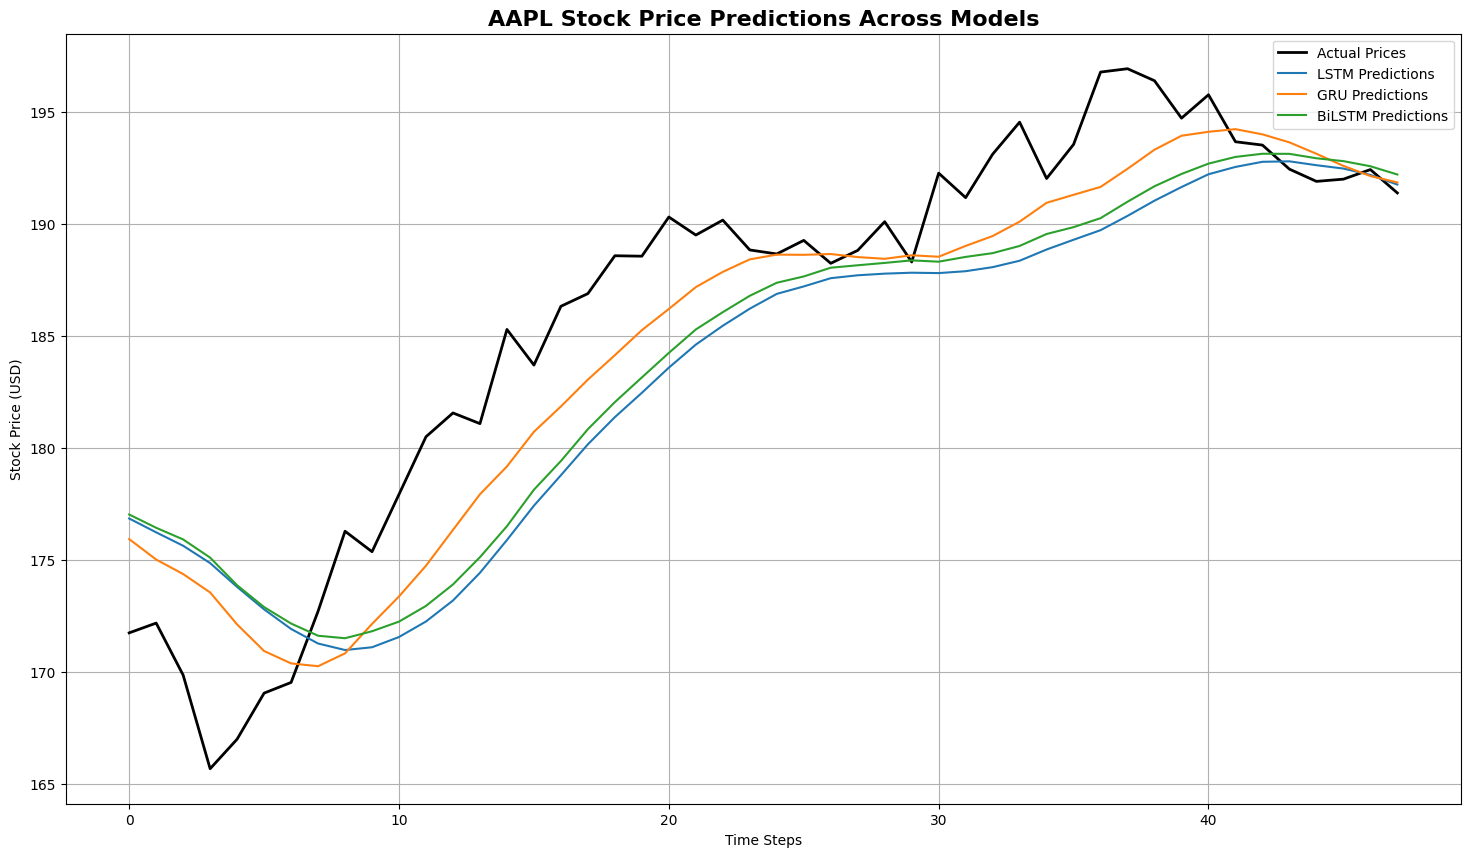

[*********************100%***********************]  1 of 1 completed

Performance Metrics for AAPL:
LSTM: RMSE=5.00, MAE=4.26, R²=0.68
GRU: RMSE=3.35, MAE=2.75, R²=0.86
BiLSTM: RMSE=4.61, MAE=3.88, R²=0.73


Processing MSFT...
Training LSTM Model for MSFT...


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step
Training GRU Model for MSFT...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
Training BiLSTM Model for MSFT...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step


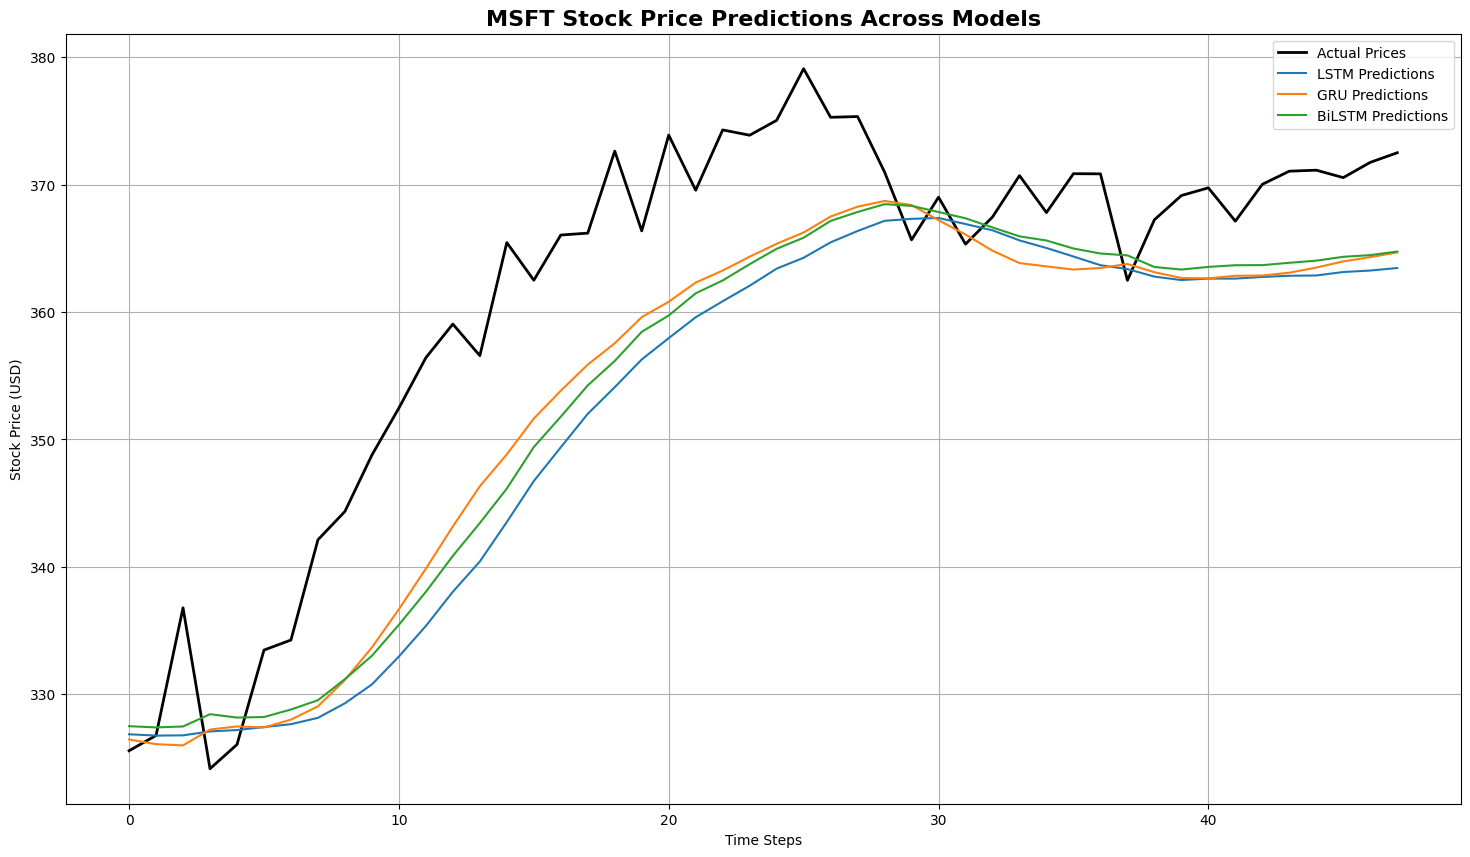

[*********************100%***********************]  1 of 1 completed

Performance Metrics for MSFT:
LSTM: RMSE=11.19, MAE=9.38, R²=0.46
GRU: RMSE=9.19, MAE=7.99, R²=0.64
BiLSTM: RMSE=9.72, MAE=8.22, R²=0.59


Processing GOOGL...
Training LSTM Model for GOOGL...


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step
Training GRU Model for GOOGL...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 392ms/step
Training BiLSTM Model for GOOGL...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


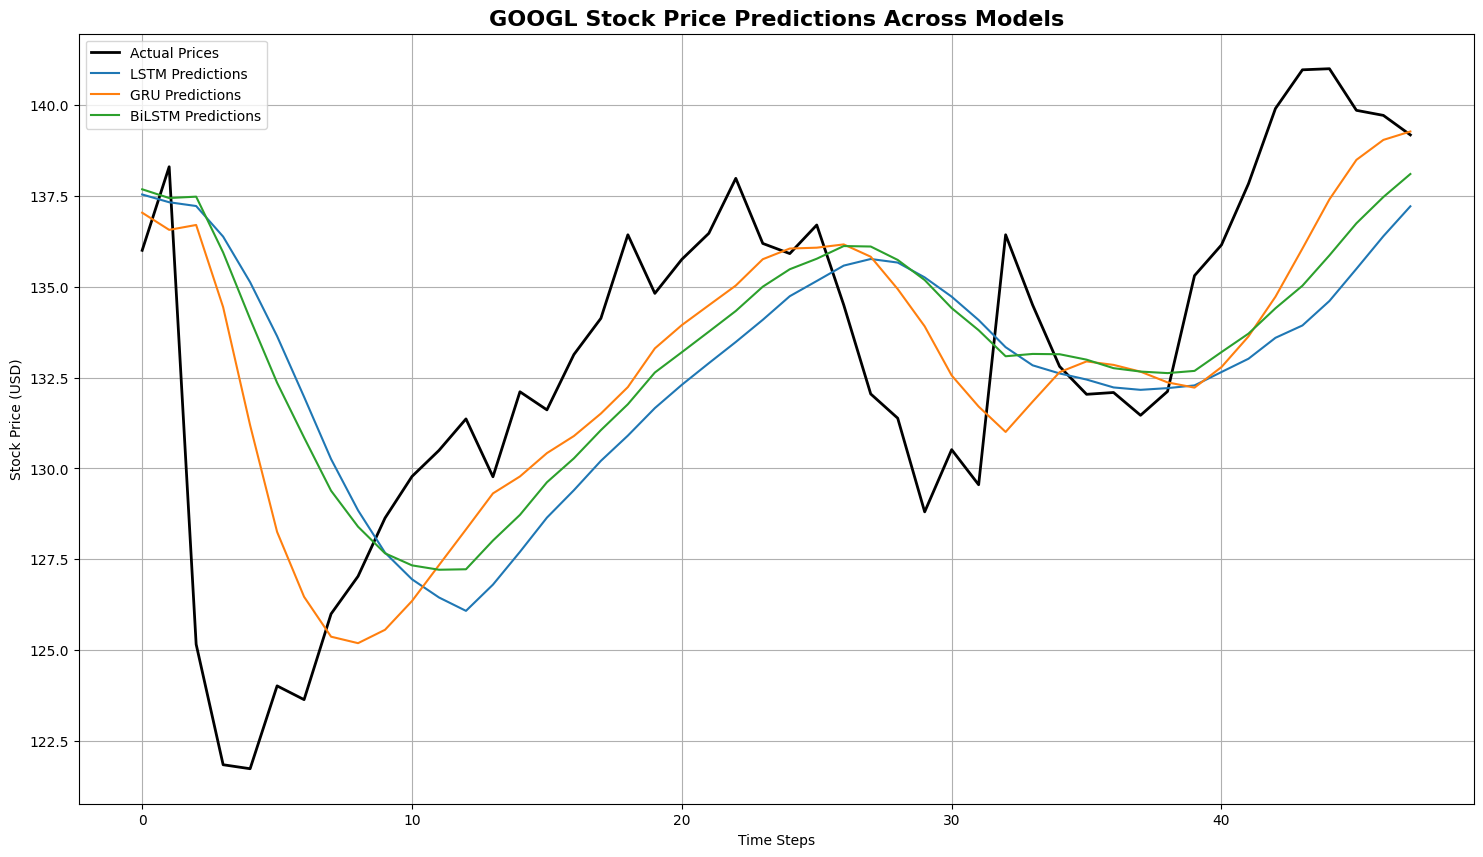

[*********************100%***********************]  1 of 1 completed

Performance Metrics for GOOGL:
LSTM: RMSE=5.15, MAE=4.04, R²=-0.10
GRU: RMSE=3.87, MAE=2.86, R²=0.38
BiLSTM: RMSE=4.65, MAE=3.53, R²=0.10


Processing AMZN...
Training LSTM Model for AMZN...


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 466ms/step
Training GRU Model for AMZN...
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step   
Training BiLSTM Model for AMZN...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step


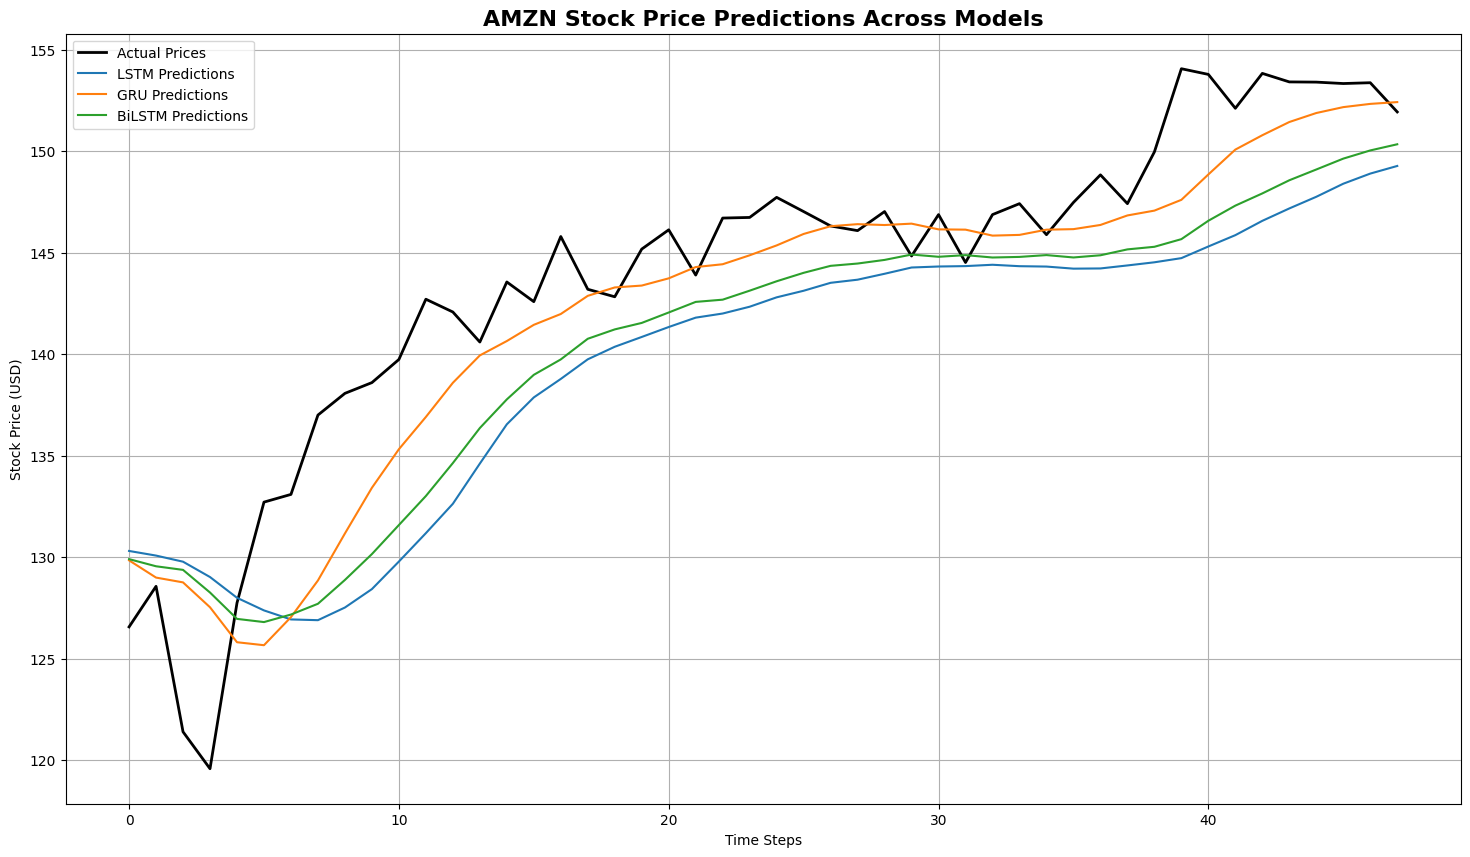

[*********************100%***********************]  1 of 1 completed

Performance Metrics for AMZN:
LSTM: RMSE=5.91, MAE=5.14, R²=0.49
GRU: RMSE=3.50, MAE=2.65, R²=0.82
BiLSTM: RMSE=5.01, MAE=4.28, R²=0.63


Processing TSLA...
Training LSTM Model for TSLA...


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 362ms/step
Training GRU Model for TSLA...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 441ms/step
Training BiLSTM Model for TSLA...
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step


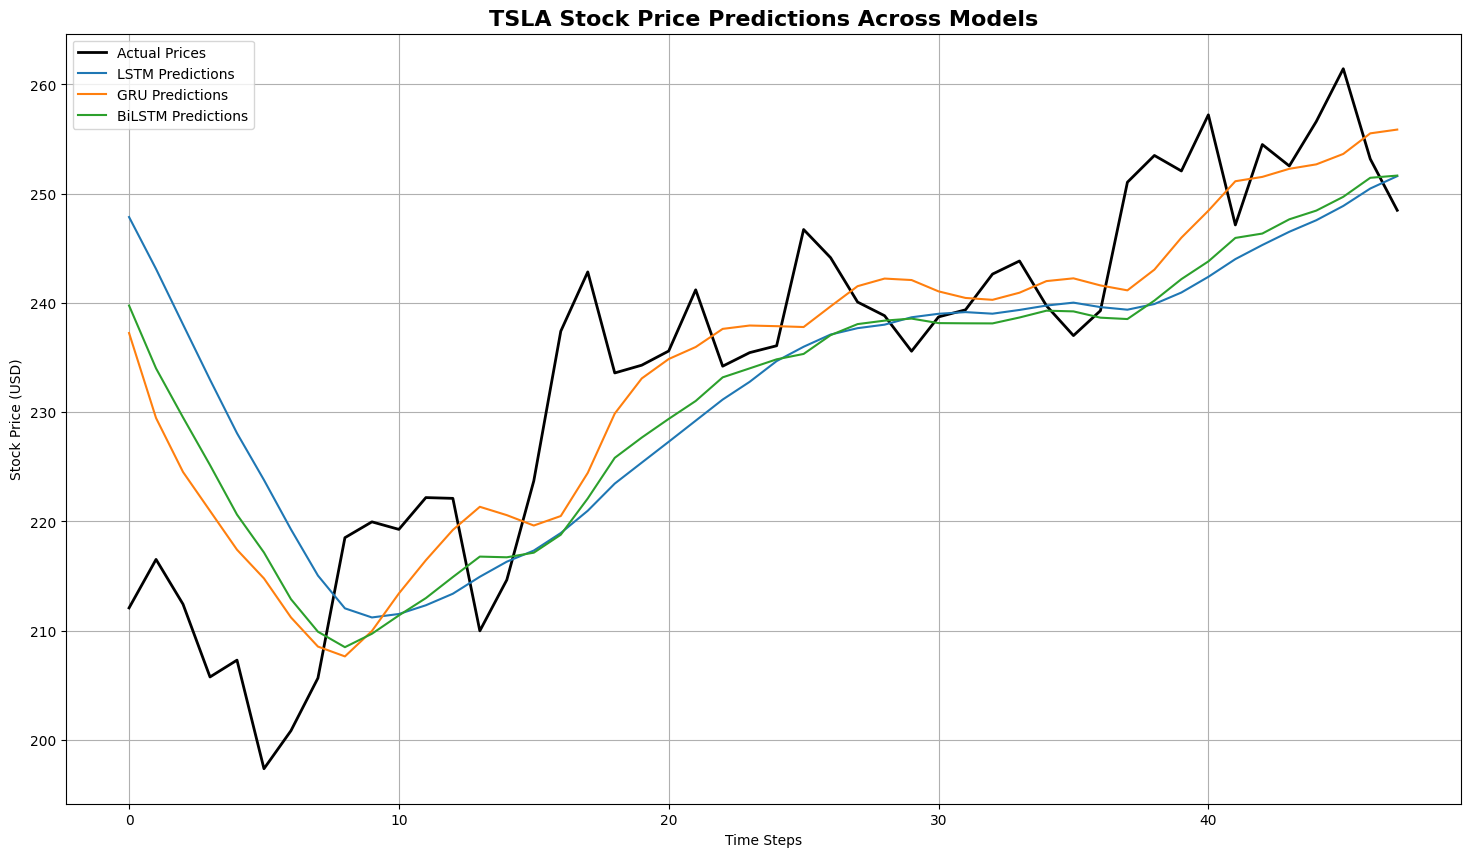

[*********************100%***********************]  1 of 1 completed

Performance Metrics for TSLA:
LSTM: RMSE=12.80, MAE=9.68, R²=0.40
GRU: RMSE=8.61, MAE=6.75, R²=0.73
BiLSTM: RMSE=10.37, MAE=8.16, R²=0.60


Processing META...


Training LSTM Model for META...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step
Training GRU Model for META...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 409ms/step
Training BiLSTM Model for META...
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step


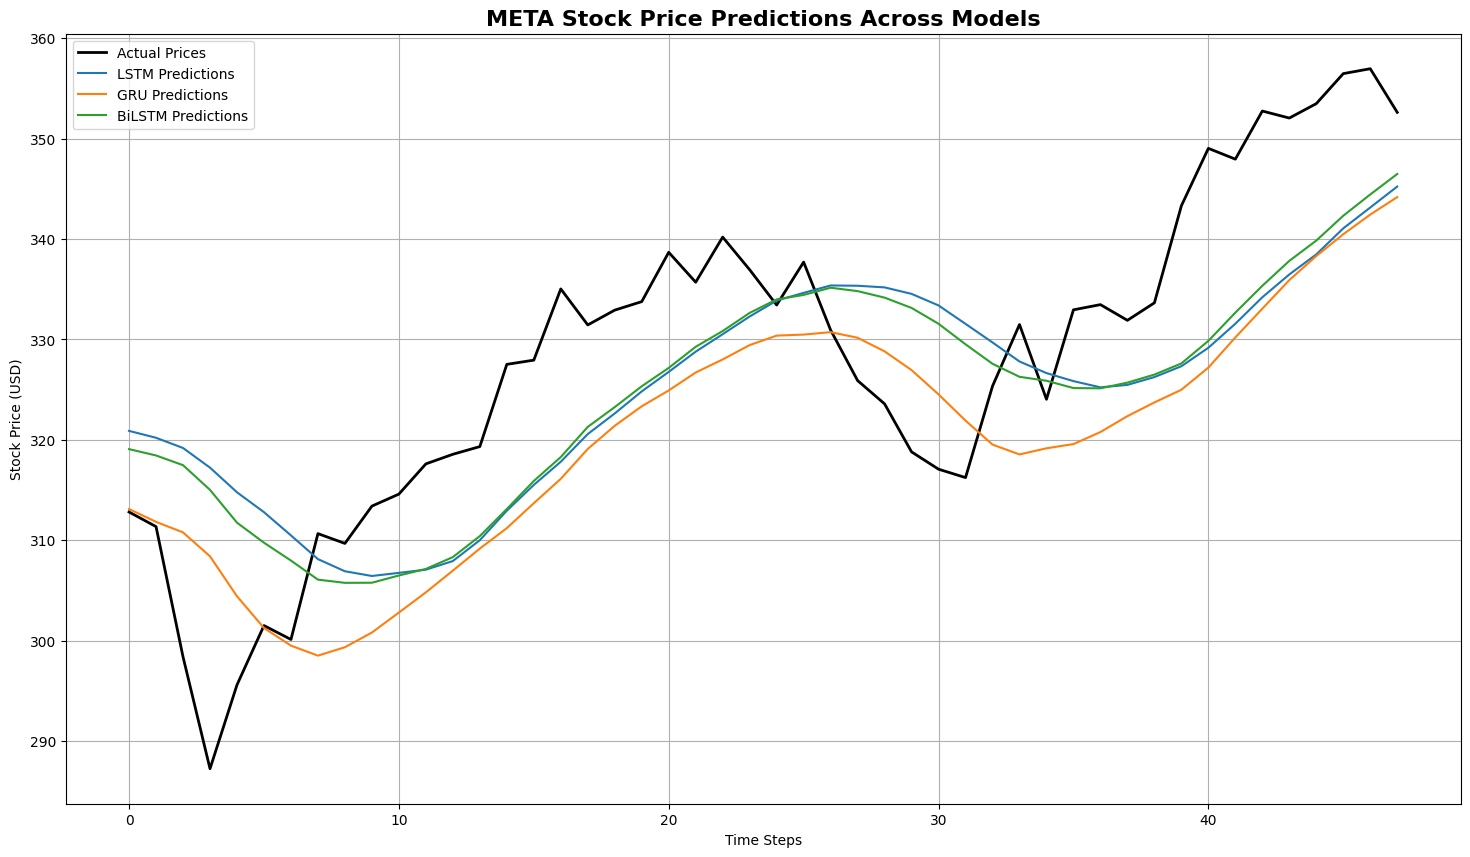

[*********************100%***********************]  1 of 1 completed

Performance Metrics for META:
LSTM: RMSE=12.29, MAE=10.85, R²=0.45
GRU: RMSE=11.98, MAE=10.62, R²=0.48
BiLSTM: RMSE=11.41, MAE=10.12, R²=0.53


Processing NVDA...
Training LSTM Model for NVDA...


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step
Training GRU Model for NVDA...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 407ms/step
Training BiLSTM Model for NVDA...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


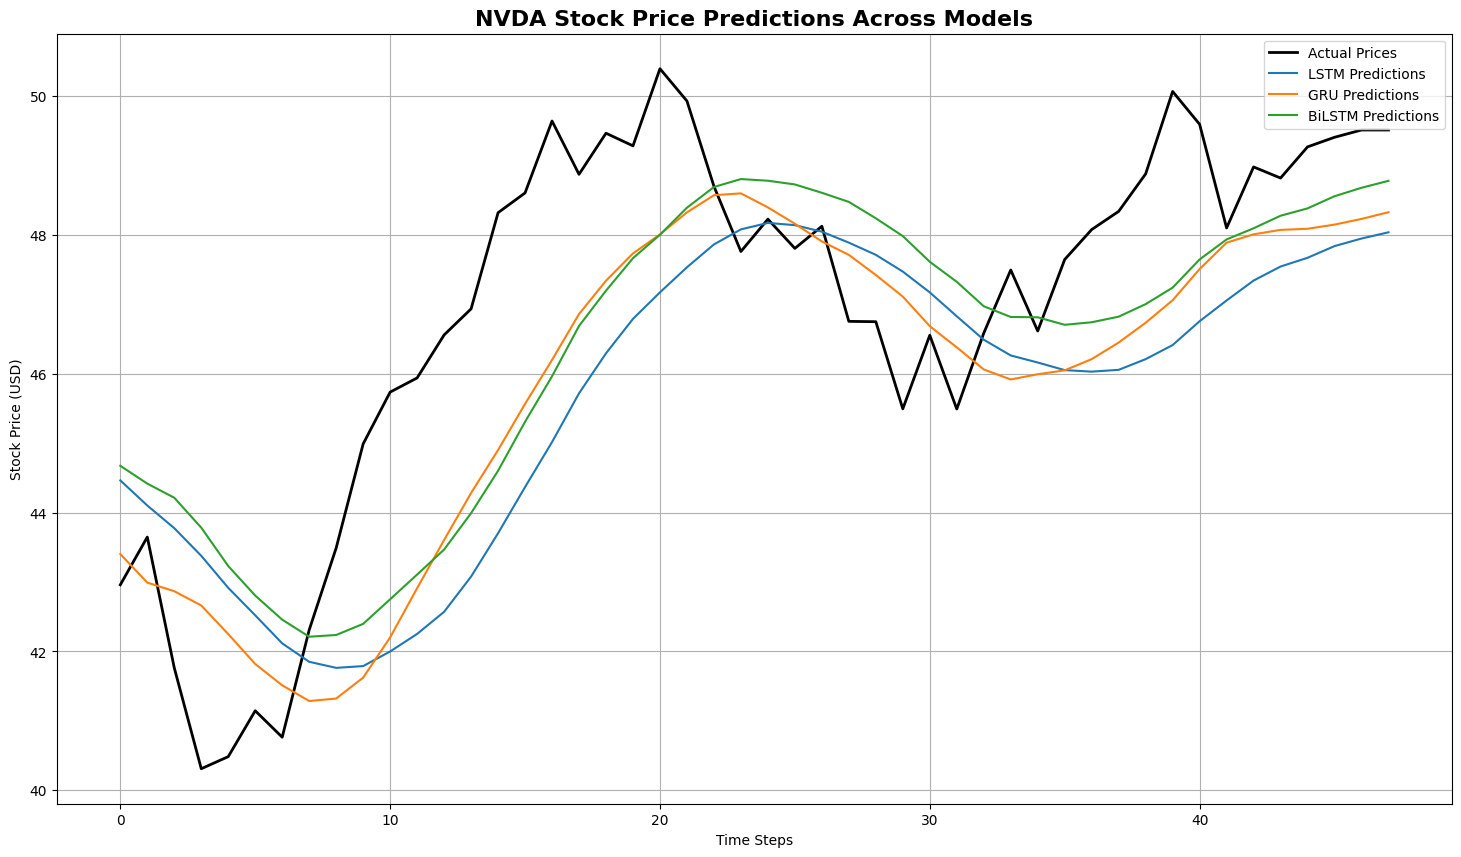

[*********************100%***********************]  1 of 1 completed

Performance Metrics for NVDA:
LSTM: RMSE=2.36, MAE=1.99, R²=0.28
GRU: RMSE=1.84, MAE=1.54, R²=0.56
BiLSTM: RMSE=1.94, MAE=1.65, R²=0.51


Processing NFLX...
Training LSTM Model for NFLX...


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step
Training GRU Model for NFLX...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 401ms/step
Training BiLSTM Model for NFLX...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


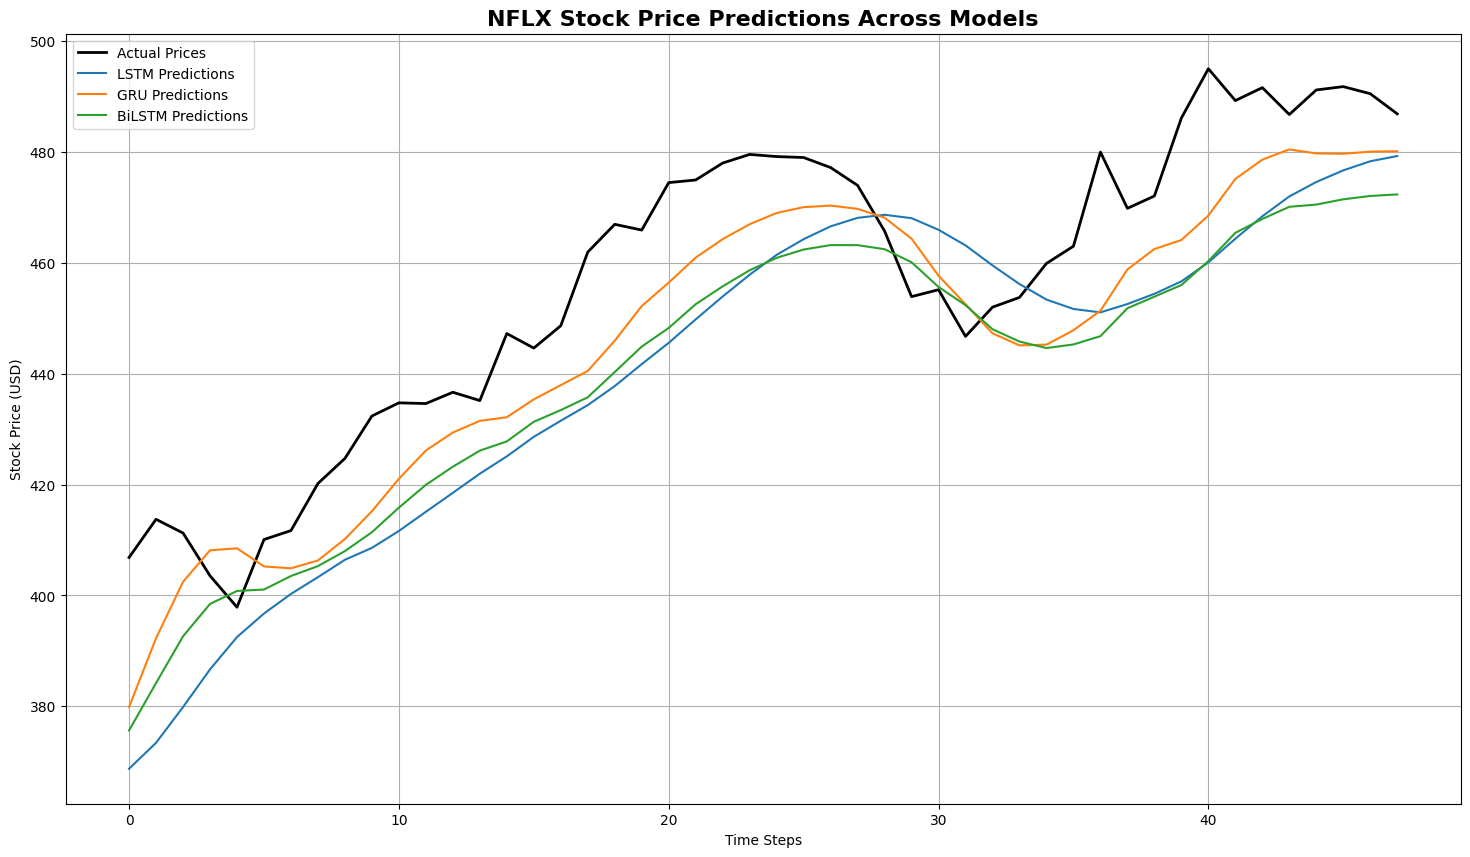

[*********************100%***********************]  1 of 1 completed

Performance Metrics for NFLX:
LSTM: RMSE=20.50, MAE=18.53, R²=0.45
GRU: RMSE=13.61, MAE=12.06, R²=0.76
BiLSTM: RMSE=18.93, MAE=17.07, R²=0.53


Processing IBM...
Training LSTM Model for IBM...


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step
Training GRU Model for IBM...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 396ms/step
Training BiLSTM Model for IBM...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


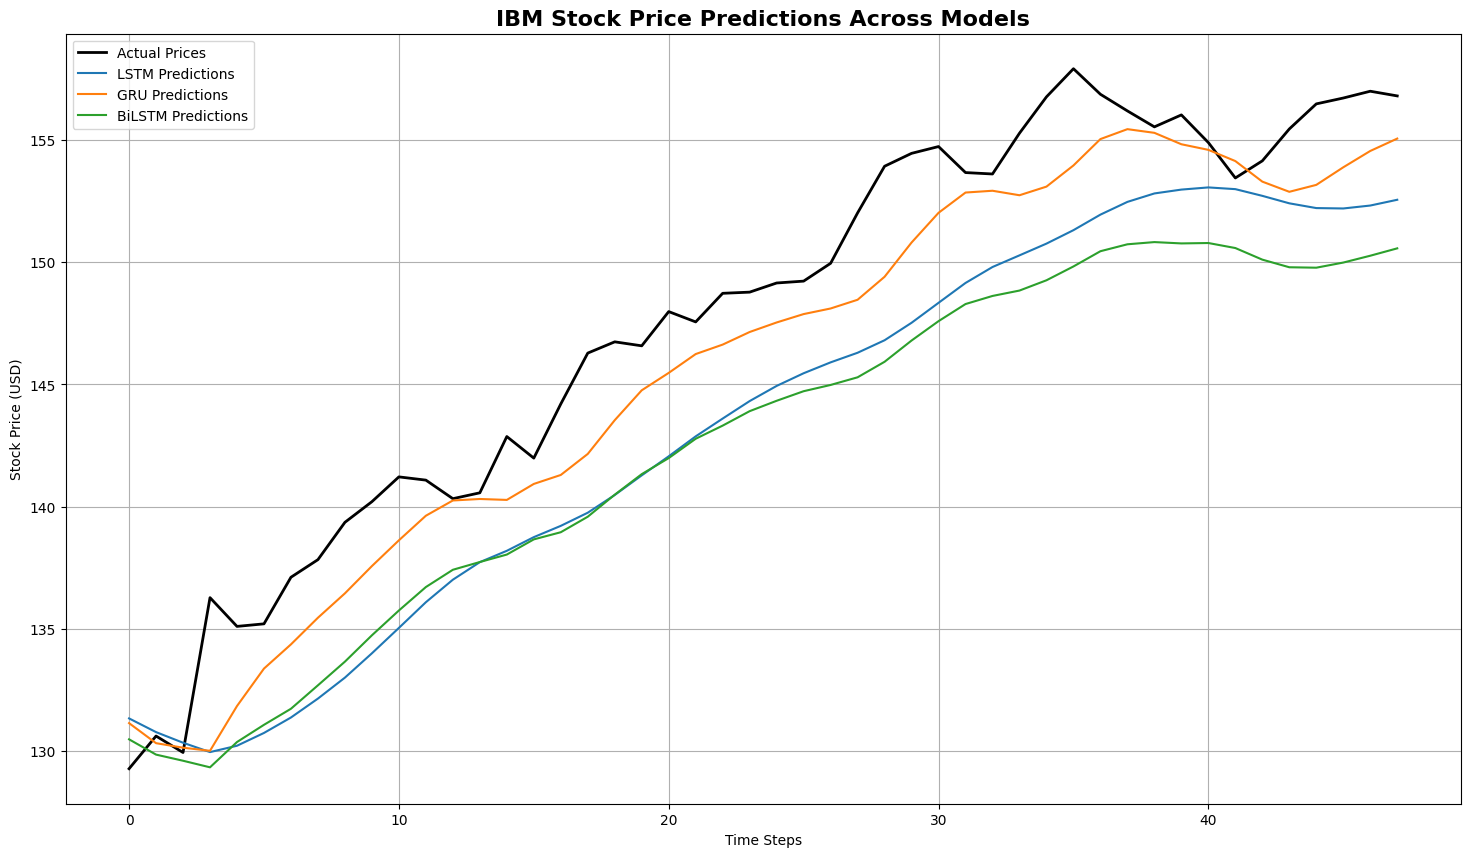

[*********************100%***********************]  1 of 1 completed

Performance Metrics for IBM:
LSTM: RMSE=4.77, MAE=4.45, R²=0.67
GRU: RMSE=2.48, MAE=2.12, R²=0.91
BiLSTM: RMSE=5.46, MAE=5.19, R²=0.56


Processing INTC...
Training LSTM Model for INTC...


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step
Training GRU Model for INTC...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 441ms/step
Training BiLSTM Model for INTC...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step


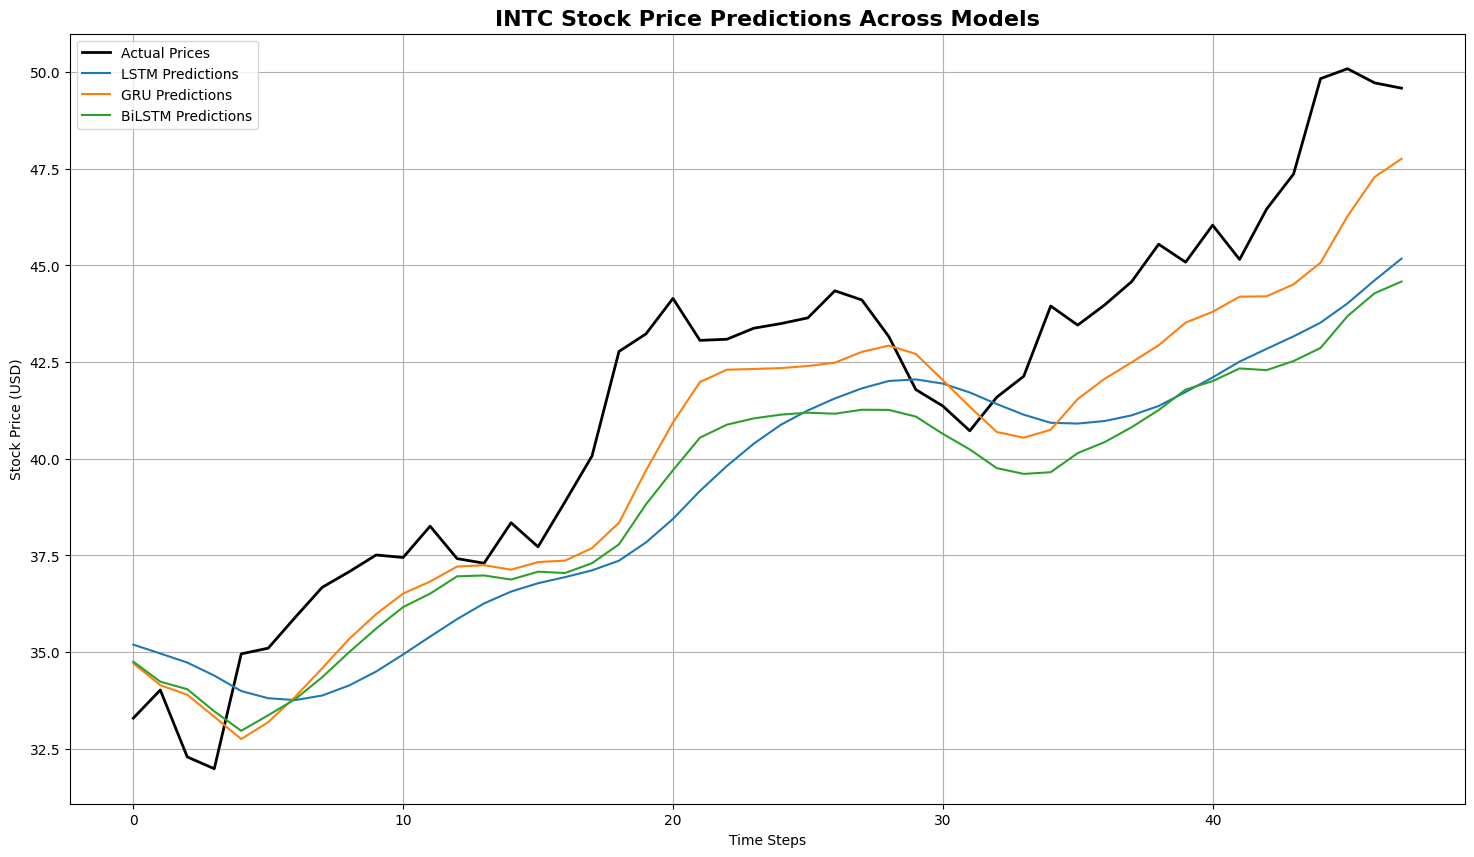

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Performance Metrics for INTC:
LSTM: RMSE=3.16, MAE=2.77, R²=0.54
GRU: RMSE=2.02, MAE=1.73, R²=0.81
BiLSTM: RMSE=3.13, MAE=2.70, R²=0.55


Processing AMD...
No data found for AMD. Skipping.

Processing ORCL...
Training LSTM Model for ORCL...


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step
Training GRU Model for ORCL...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 418ms/step
Training BiLSTM Model for ORCL...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


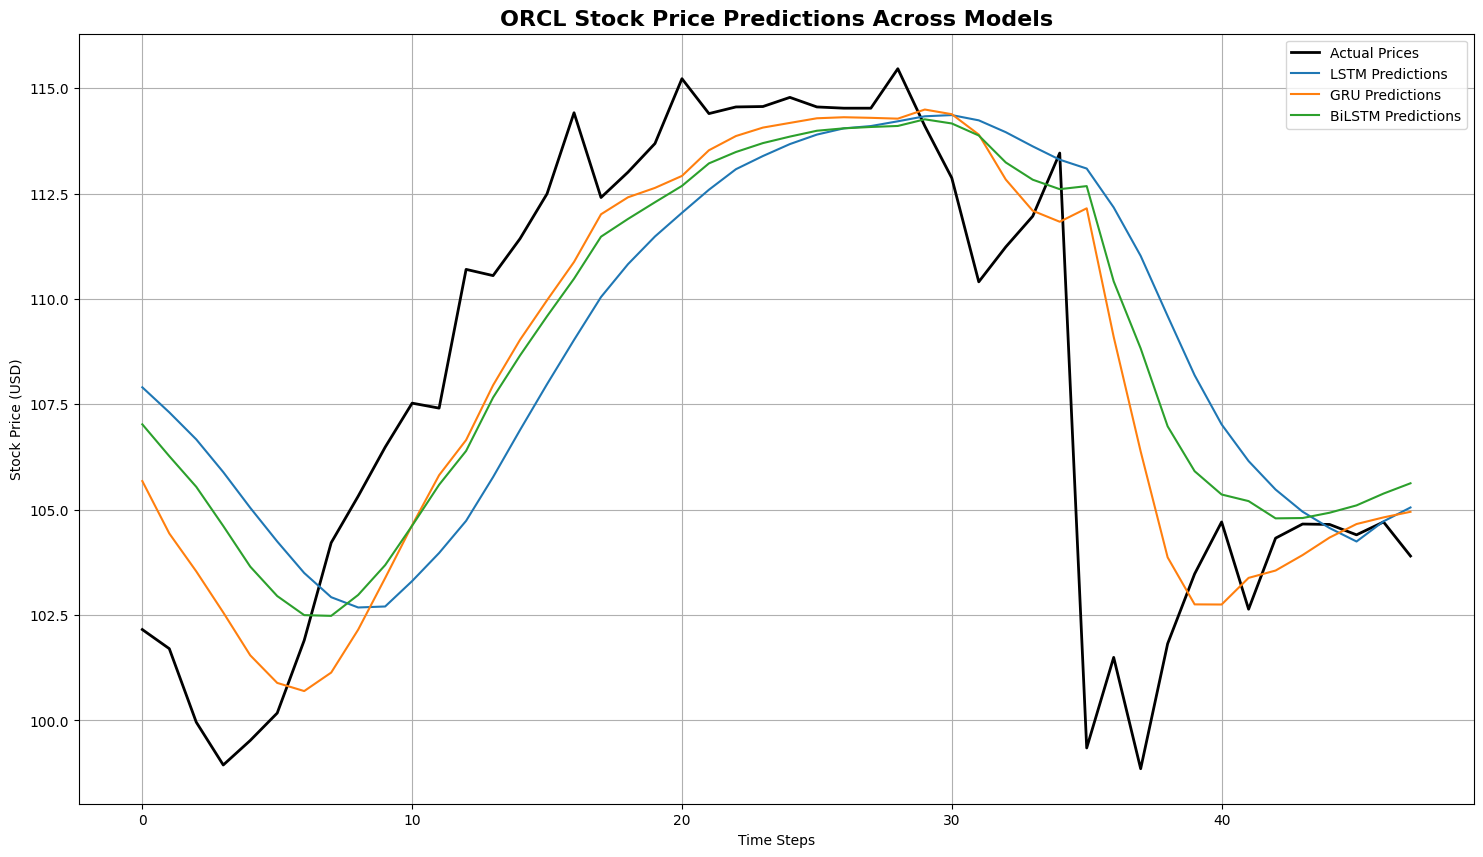

[*********************100%***********************]  1 of 1 completed

Performance Metrics for ORCL:
LSTM: RMSE=4.58, MAE=3.39, R²=0.32
GRU: RMSE=3.09, MAE=2.10, R²=0.69
BiLSTM: RMSE=3.70, MAE=2.61, R²=0.56


Processing CSCO...
Training LSTM Model for CSCO...


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step
Training GRU Model for CSCO...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 404ms/step
Training BiLSTM Model for CSCO...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


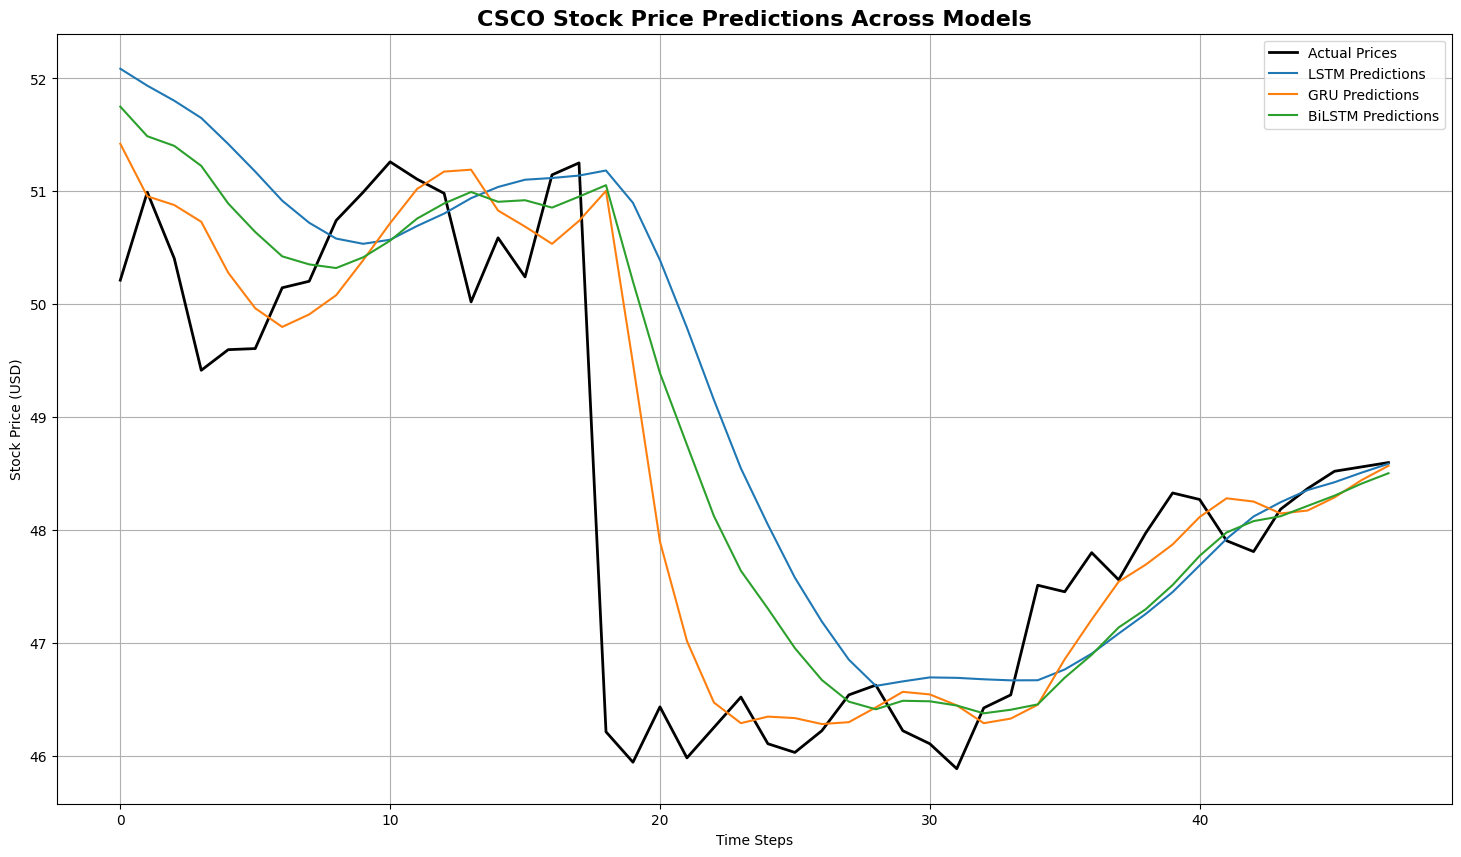

[*********************100%***********************]  1 of 1 completed

Performance Metrics for CSCO:
LSTM: RMSE=1.61, MAE=1.06, R²=0.23
GRU: RMSE=1.02, MAE=0.59, R²=0.69
BiLSTM: RMSE=1.31, MAE=0.84, R²=0.49


Processing QCOM...
Training LSTM Model for QCOM...


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 367ms/step
Training GRU Model for QCOM...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 389ms/step
Training BiLSTM Model for QCOM...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


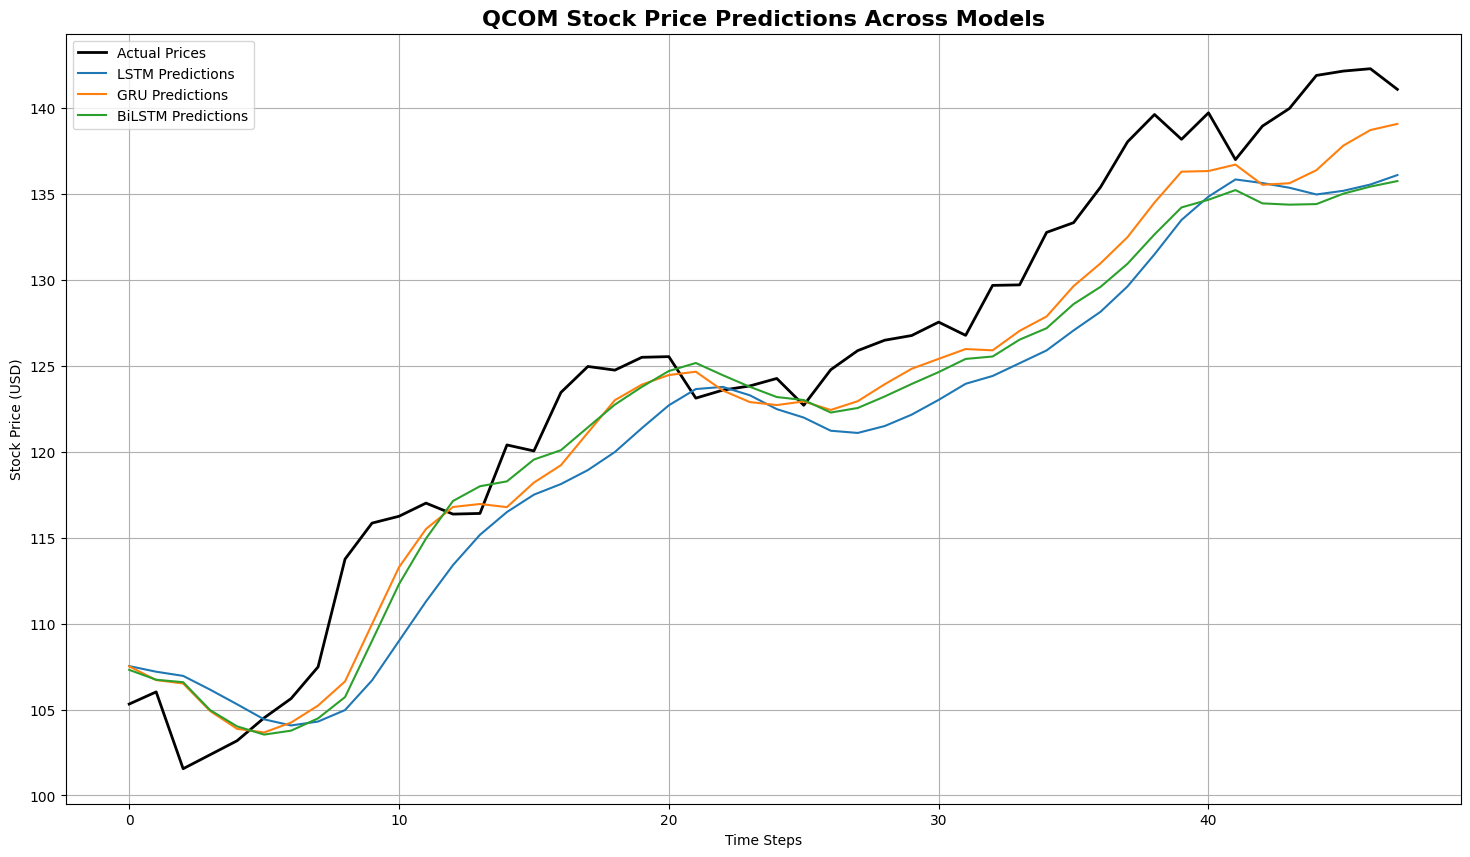

[*********************100%***********************]  1 of 1 completed

Performance Metrics for QCOM:
LSTM: RMSE=4.88, MAE=4.25, R²=0.83
GRU: RMSE=3.16, MAE=2.66, R²=0.93
BiLSTM: RMSE=3.99, MAE=3.33, R²=0.89


Processing ADBE...
Training LSTM Model for ADBE...


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 348ms/step
Training GRU Model for ADBE...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step
Training BiLSTM Model for ADBE...
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 736ms/step


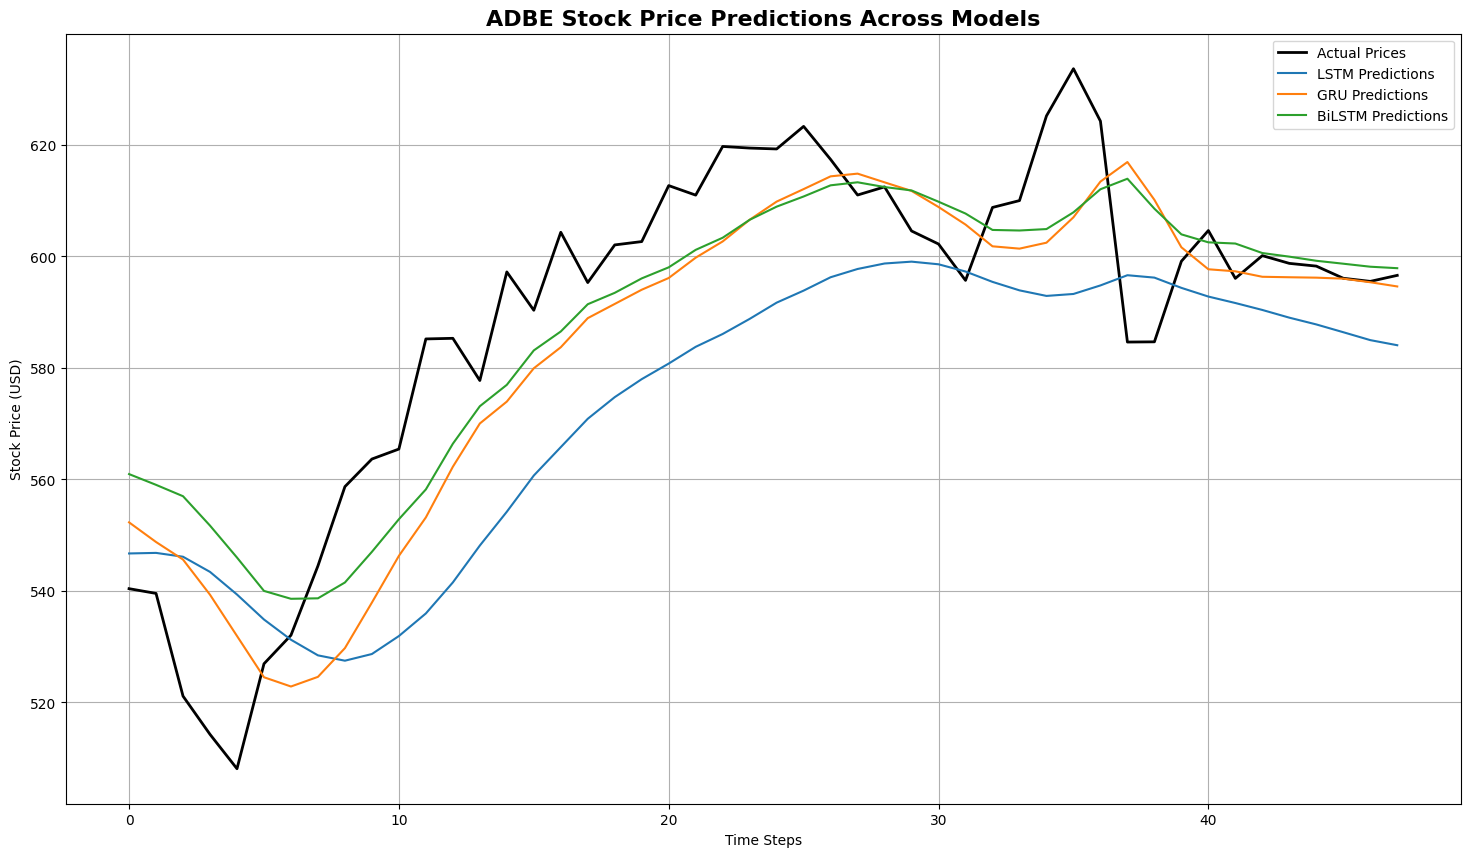

Performance Metrics for ADBE:
LSTM: RMSE=24.57, MAE=21.08, R²=0.39
GRU: RMSE=15.70, MAE=12.65, R²=0.75
BiLSTM: RMSE=15.81, MAE=12.32, R²=0.75




In [ ]:
# This is import part i mean you are connecting the dataset and the stocks we extracted from Y finance

for ticker in tickers:
    print(f'Processing {ticker}...')
    stock_data = yf.download(ticker, start='2010-01-01', end='2023-12-31')
    apple_esg_data = esg_data[esg_data['Symbol'] == ticker]

    if apple_esg_data.empty or stock_data.empty:
        print(f'No data found for {ticker}. Skipping.\n')
        continue

    environment_score = apple_esg_data['environmentScore'].values[0]
    social_score = apple_esg_data['socialScore'].values[0]
    governance_score = apple_esg_data['governanceScore'].values[0]
    total_esg = apple_esg_data['totalEsg'].values[0]

    trading_days_2023 = pd.date_range(start='2023-01-01', end='2023-12-31', freq='B')
    esg_df = pd.DataFrame({
        'Date': trading_days_2023,
        'environmentScore': [environment_score] * len(trading_days_2023),
        'socialScore': [social_score] * len(trading_days_2023),
        'governanceScore': [governance_score] * len(trading_days_2023),
        'totalEsg': [total_esg] * len(trading_days_2023),
    })
    esg_df.set_index('Date', inplace=True)

    stock_data_reset = stock_data.reset_index()
    stock_data_2023 = stock_data_reset[stock_data_reset['Date'].dt.year == 2023]
    stock_data_2023_reset = stock_data_2023.reset_index(drop=True)
    stock_data_2023_reset.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in stock_data_2023_reset.columns]
    stock_data_2023_reset['Date_'] = stock_data_2023_reset['Date_'].dt.tz_localize(None)

    merged_data = stock_data_2023_reset.merge(esg_df, left_on='Date_', right_index=True, how='inner')

    # Dynamic column handling
    close_col = f'Close_{ticker}' if f'Close_{ticker}' in merged_data.columns else 'Close'
    if close_col not in merged_data.columns:
        print(f'Close price column not found for {ticker}. Skipping.\n')
        continue

    # Scaling the  data here
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(merged_data[[close_col, 'environmentScore', 'socialScore', 'governanceScore', 'totalEsg']])

    X, y = create_sequences(scaled_data, time_steps)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

    all_predictions = {}

    # Train and evaluate models here
    for model_type in ['LSTM', 'GRU', 'BiLSTM']:
        print(f'Training {model_type} Model for {ticker}...')
        model = build_model(model_type)
        predictions, rmse, mae, r2, y_test_inverse = evaluate_model(model, X_train, y_train, X_test, y_test, scaler, model_type, ticker)
        all_predictions[model_type] = predictions
        results[f'{ticker}_{model_type}'] = {'Ticker': ticker, 'Model': model_type, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

    # Plot all model predictions together
    plt.figure(figsize=(18, 10))
    plt.plot(y_test_inverse, label='Actual Prices', color='black', linewidth=2)
    for model_type, preds in all_predictions.items():
        plt.plot(preds, label=f'{model_type} Predictions')
    plt.title(f'{ticker} Stock Price Predictions Across Models', fontsize=16, fontweight='bold')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Display performance metrics
    print(f'Performance Metrics for {ticker}:')
    for model_type, metrics in results.items():
        if metrics['Ticker'] == ticker:
            print(f"{metrics['Model']}: RMSE={metrics['RMSE']:.2f}, MAE={metrics['MAE']:.2f}, R²={metrics['R2']:.2f}")
    print("\n")


In [ ]:
results_df = pd.DataFrame(results).T

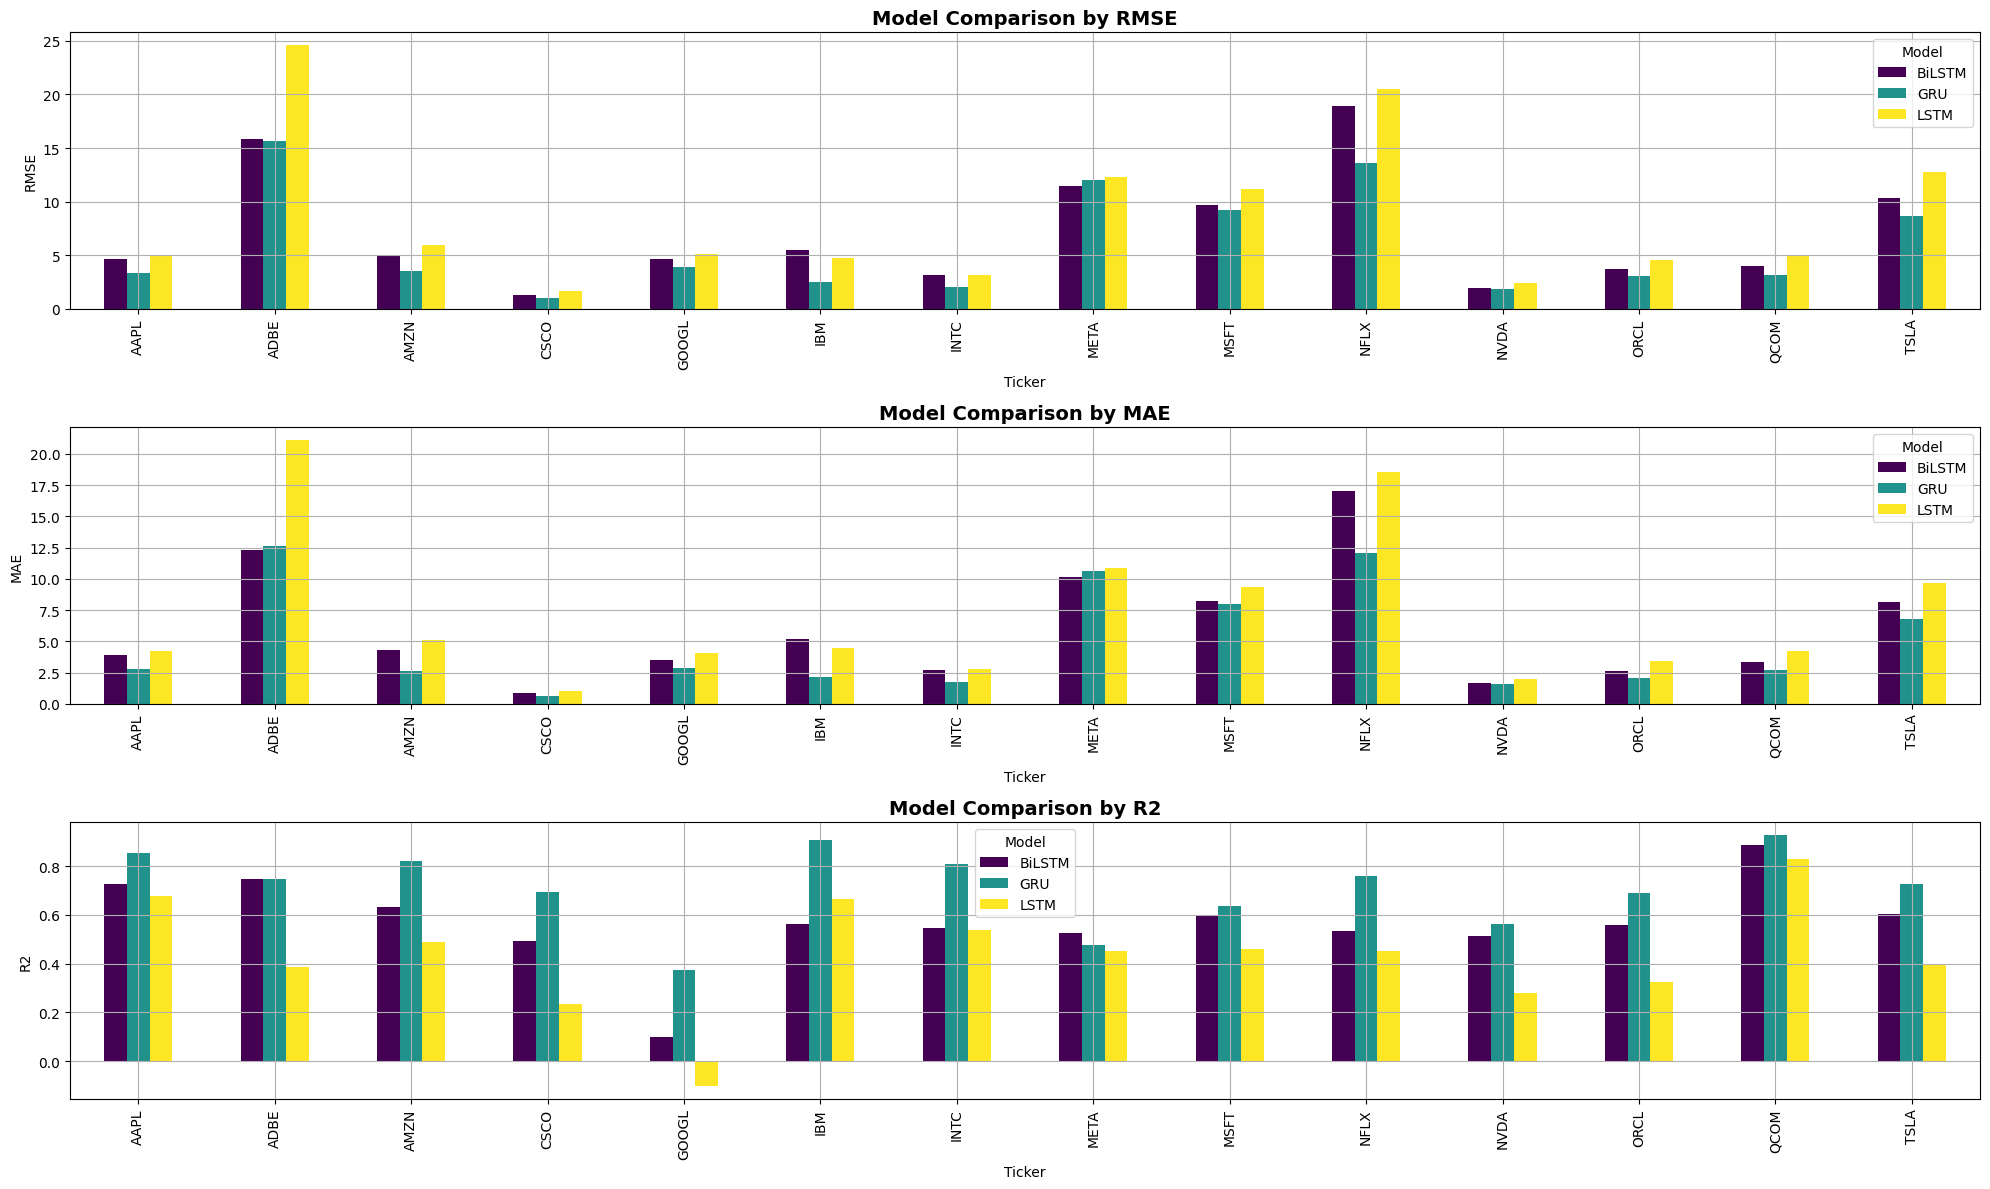

In [ ]:
metrics = ['RMSE', 'MAE', 'R2']
plt.figure(figsize=(20, 12))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 1, i)
    results_df_pivot = results_df.pivot_table(values=metric, index='Ticker', columns='Model')
    results_df_pivot.plot(kind='bar', ax=plt.gca(), colormap='viridis')
    plt.title(f'Model Comparison by {metric}', fontsize=14, fontweight='bold')
    plt.ylabel(metric)
    plt.xlabel('Ticker')
    plt.legend(title='Model')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print('Final Model Performance Summary:')
final_summary = results_df[['Ticker', 'Model', 'RMSE', 'MAE', 'R2']].sort_values(by=['Ticker', 'Model'])
print(final_summary)


Final Model Performance Summary:
             Ticker   Model       RMSE        MAE        R2
AAPL_BiLSTM    AAPL  BiLSTM   4.610673   3.875109   0.72688
AAPL_GRU       AAPL     GRU   3.353089   2.749537  0.855551
AAPL_LSTM      AAPL    LSTM   4.997126   4.257285  0.679177
ADBE_BiLSTM    ADBE  BiLSTM  15.805983  12.321939  0.745718
ADBE_GRU       ADBE     GRU   15.69678  12.649812  0.749219
ADBE_LSTM      ADBE    LSTM  24.570607  21.077878  0.385524
AMZN_BiLSTM    AMZN  BiLSTM    5.01282    4.27846  0.630881
AMZN_GRU       AMZN     GRU   3.504125   2.650557  0.819631
AMZN_LSTM      AMZN    LSTM   5.907305   5.142144  0.487397
CSCO_BiLSTM    CSCO  BiLSTM    1.31225   0.843663    0.4943
CSCO_GRU       CSCO     GRU   1.019699   0.591194  0.694646
CSCO_LSTM      CSCO    LSTM   1.614609   1.055412  0.234413
GOOGL_BiLSTM  GOOGL  BiLSTM   4.653916   3.533724  0.099082
GOOGL_GRU     GOOGL     GRU   3.874602   2.860842  0.375543
GOOGL_LSTM    GOOGL    LSTM    5.14991   4.043978 -0.103183
IBM_BiL

In [ ]:
# Export to CSV
final_summary.to_csv('model_performance_summary.csv', index=False)
print("Model performance summary saved to 'model_performance_summary.csv'")

Model performance summary saved to 'model_performance_summary.csv'
